In [1]:
#Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import matplotlib as mpl

In [2]:
#import data
df_ords_customers = pd.read_pickle(r'/Users/marianino/Desktop/Instacart Basket Analysis/Data/Prepared Data/orders_products_customer_merged.pkl')

In [3]:
#Check data
df_ords_customers.shape

(32404859, 33)

In [4]:
df_ords_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32404859 entries, 0 to 32404858
Data columns (total 33 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   product_id             int64         
 1   product_name           object        
 2   aisle_id               int64         
 3   department_id          int64         
 4   prices                 float64       
 5   order_id               int64         
 6   user_id                object        
 7   order_number           int64         
 8   orders_day_of_week     int64         
 9   order_hour_of_day      int64         
 10  days_since_last_order  float64       
 11  add_to_cart_order      int64         
 12  reordered              int64         
 13  price_range_loc        object        
 14  busiest_day            object        
 15  Busiest_days           object        
 16  busiest_period_of_day  object        
 17  max_order              int64         
 18  loyalty_flag        

Step 2 was done in a separate notebook, where I followed the instructions in the excercise. I will attach that notebook with these other 2, so I will continue with step 3.

# Step 3: Order_hour_of_ day visualization

In [5]:
df_ords_customers.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,first_name,last_name,gender,state,age,date_joined,n_dependants,fam_status,income,_merge
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Charles,Cox,Male,Minnesota,81,2019-08-01,1,married,49620,both
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Charles,Cox,Male,Minnesota,81,2019-08-01,1,married,49620,both
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,1,5,13,...,Charles,Cox,Male,Minnesota,81,2019-08-01,1,married,49620,both
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,...,Charles,Cox,Male,Minnesota,81,2019-08-01,1,married,49620,both
4,1000,Apricots,18,10,12.9,505689,138,9,6,12,...,Charles,Cox,Male,Minnesota,81,2019-08-01,1,married,49620,both


In [6]:
df_ohod = df_ords_customers[['order_hour_of_day']]

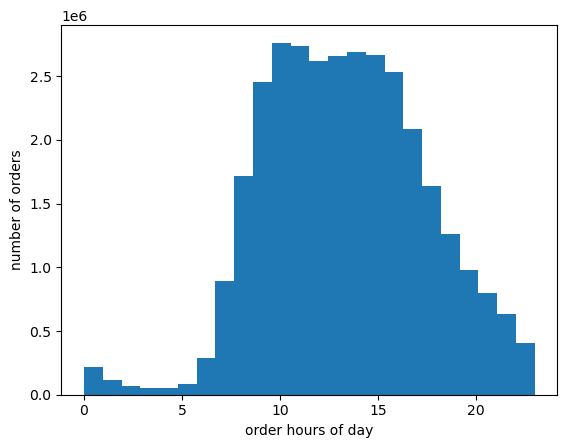

In [7]:
hist_ohod = df_ohod['order_hour_of_day'].plot.hist(bins=24,
xlabel='order hours of day', ylabel='number of orders')

Observations: 
Most orders are made between 10am and 3pm, as the day progresses the orders slowdown. In the morning there are fewer orders. 

In [8]:
#Export the chart

In [9]:
hist_ohod.figure.savefig(r'/Users/marianino/Desktop/Instacart Basket Analysis/Analysis/bar_orders_hours.png')

# Step 4: Loyalty flag visualization

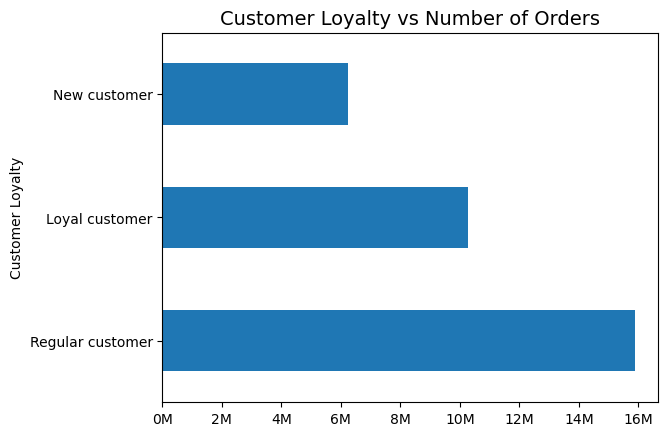

In [10]:
# horizontal bar graph loyalty flag vs count of orders per loyalty flag
bar_loyal = df_ords_customers['loyalty_flag'].value_counts().plot.barh(ylabel="Customer Loyalty", x="Number of Orders")
plt.title("Customer Loyalty vs Number of Orders", fontsize=14)
bar_loyal.xaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda
x,pos: format(x/1000000,'1.0f')+'M'))

In [11]:
# checking the order count of loyalty flags
df_ords_customers['loyalty_flag'].value_counts()

loyalty_flag
Regular customer    15876776
Loyal customer      10284093
New customer         6243990
Name: count, dtype: int64

observations: based on the graph and loyalty counts we can see that regular customers make the most orders followed by loyal customers and lastly the new customers. 

In [12]:
#Export chart
bar_loyal.figure.savefig(r'/Users/marianino/Desktop/Instacart Basket Analysis/Analysis/bar_loyalty_flag.png')

# Step 5: Prices and hour of the day

Extract order_hour_of_day and prices from sample "small" df

In [13]:
# spliting dataframes into 70/30 by assigning 'True' to random number less than 0.7 and 'False' to more
#create the random seed so its replicable
np.random.seed(4)
#create a list of (True, False) values based on random assignment of values between 0-1 and is less than 0.7
dev = np.random.rand(len(df_ords_customers)) <= 0.7
# Stores 70% of data sample in big dataframe (<= 0.7)
big = df_ords_customers[dev]
# Stores 30% of data sample in small dataframe (> 0.7)
small = df_ords_customers[~dev]

In [14]:
# extracting relevant columns and checking the dataframe
df_small_oho_prices = small[['order_hour_of_day', 'prices']]
df_small_oho_prices.head()

,order_hour_of_day,prices
0,11,5.8
2,13,20.0
3,14,20.0
6,13,4.4
10,9,12.8


/Users/marianino/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/marianino/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/marianino/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/marianino/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

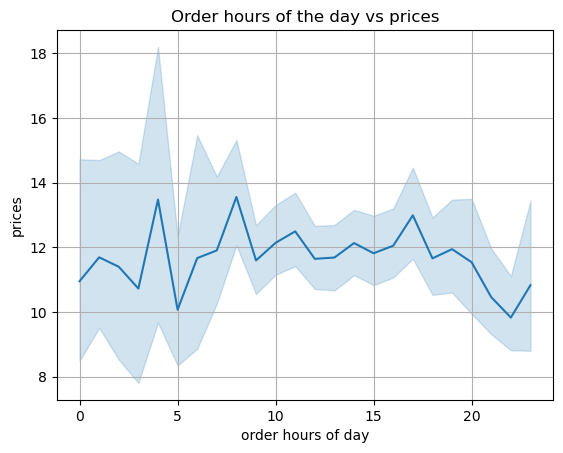

In [17]:
# Create a line graph to check correlation between order hours and prices
line_oho_prices = sns.lineplot(data=df_small_oho_prices, x='order_hour_of_day', y='prices')
line_oho_prices.set(xlabel='order hours of day')
plt.title('Order hours of the day vs prices')
plt.grid()

observation: it seems that prices tend to be higher during dawn, around 4am. Then it decreases and picks up again between 7am and 8am. 

In [18]:
#Export chart
line_oho_prices.figure.savefig(r'/Users/marianino/Desktop/Instacart Basket Analysis/Analysis/line_prices.png')

# Step 6: Correlation between age and family situation

In [19]:
# Extract age and depenandants into a dataframe
df_age_dependants = df_ords_customers[['age','n_dependants']]
df_age_dependants.head()

,age,n_dependants
0,81,1
1,81,1
2,81,1
3,81,1
4,81,1


/Users/marianino/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/marianino/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/marianino/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/marianino/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

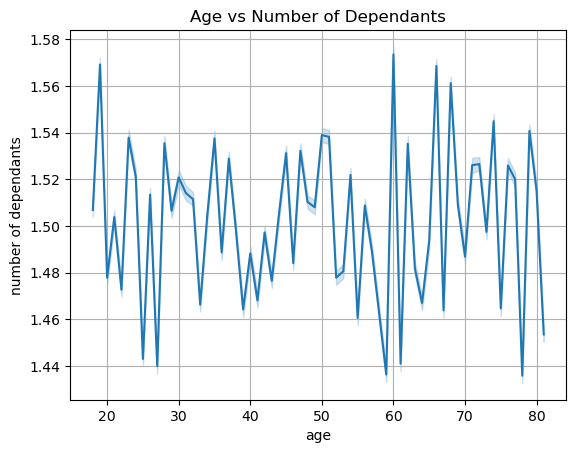

In [20]:
# create a line graph using seaborn to check for correlation
line_age_ndependants = sns.lineplot(data=df_age_dependants, x='age',
y='n_dependants')
line_age_ndependants.set(xlabel='age', ylabel='number of dependants')
plt.title('Age vs Number of Dependants')
plt.grid()

Observation: There isn't any correlation between age and number of dependants

In [21]:
#Export chart
line_age_ndependants.figure.savefig(r'/Users/marianino/Desktop/Instacart Basket Analysis/Analysis/line_age_ndependants.png')

# Step 7: Age vs Income 

In [22]:
# Extract age and income into a separate dataframe
df_age_income = df_ords_customers[['age', 'income']]
df_age_income.head()

,age,income
0,81,49620
1,81,49620
2,81,49620
3,81,49620
4,81,49620


/Users/marianino/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/marianino/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


[Text(0.5, 0, 'age'), Text(0, 0.5, 'income')]

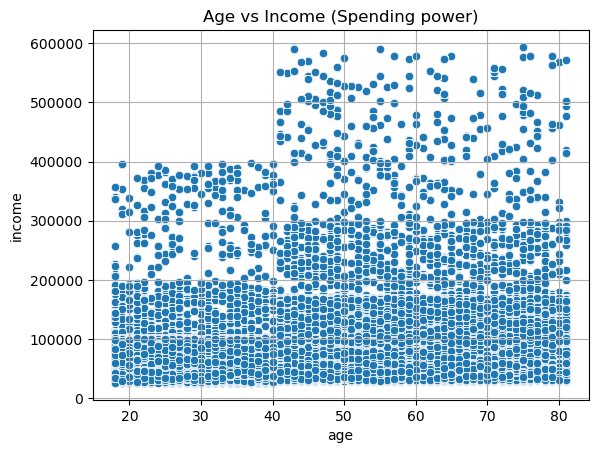

In [23]:
# Create a scatterplot to see the correlation between age and income
scatter_age_income = sns.scatterplot(x='age', y='income',
data=df_age_income)
plt.grid()
plt.title('Age vs Income (Spending power)')
scatter_age_income.set(xlabel='age', ylabel='income')

Observations: Customers between 20 and 40 years of age have an income below 400.000.
Customers above 40 years of age tend to have a higher income, reaching the 600.000 bracket.
But it seems that the majority of people earn between 200.000 or less. 

In [24]:
#Export chart
scatter_age_income.figure.savefig(r'/Users/marianino/Desktop/Instacart Basket Analysis/Analysis/scatter_age_income.png')